In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# REGULAR

In [20]:
path = 'results/reg.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].max())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
speedup = np.array([np.ones(12) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup

df["efficiency"] = df["speedup"] / df["CPU"]

df["karp"] = (1 / df["speedup"] - 1 / df["CPU"]) / (1 - 1 / df["CPU"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

,mode,CPU,size,time,pi,speedup,efficiency,karp
0,regular,1,7,8.779150,3.141711,1.000000,1.000000,0.000000
1,regular,2,7,6.242070,3.141157,1.406449,0.703224,0.422021
2,regular,3,7,4.167932,3.140656,2.106356,0.702119,0.212130
3,regular,4,7,3.236894,3.141586,2.712214,0.678054,0.158270
4,regular,5,7,2.599096,3.141655,3.377771,0.675554,0.120067
5,regular,6,7,2.237984,3.141499,3.922794,0.653799,0.105904
6,regular,7,7,2.001966,3.141652,4.385264,0.626466,0.099376
7,regular,8,7,1.801673,3.141659,4.872777,0.609097,0.091682
8,regular,9,7,1.552931,3.142190,5.653277,0.628142,0.074000
9,regular,10,7,1.509584,3.141753,5.815609,0.581561,0.079946


### TIME

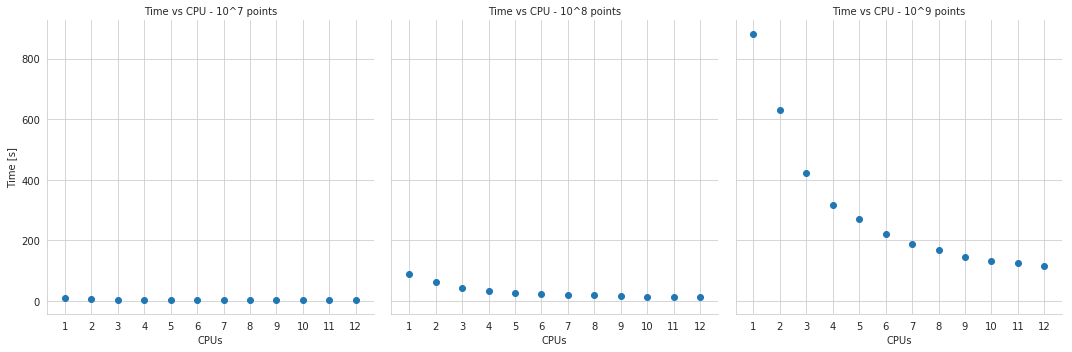

In [21]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "time")
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=list(range(1,13)))

### SPEEDUP

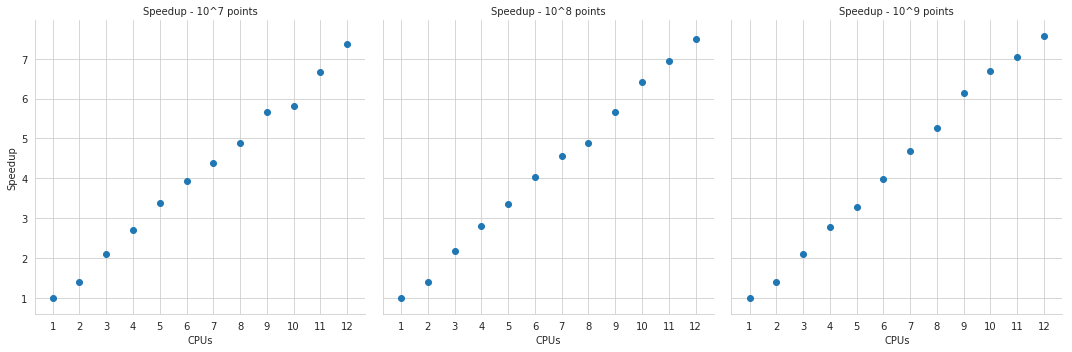

In [22]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "speedup")
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup"))
g.set(xticks=list(range(1,13)))

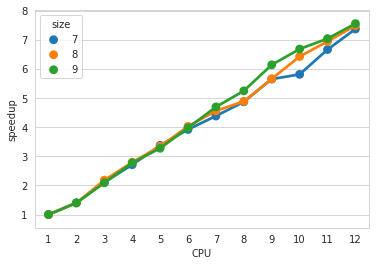

In [5]:
sns.pointplot(x="CPU", y="speedup", hue="size", data=df)

### EFFICIENCY

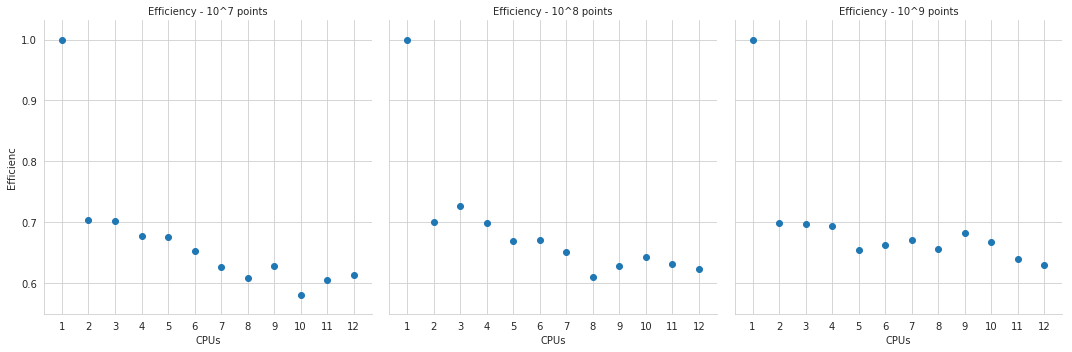

In [23]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "efficiency")
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficienc"))
g.set(xticks=list(range(1,13)))

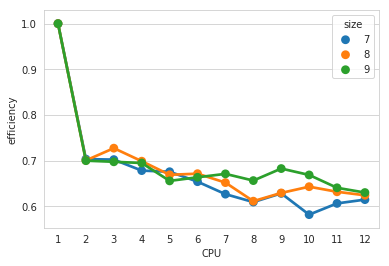

In [7]:
sns.pointplot(x="CPU", y="efficiency", hue="size", data=df)

### SERIAL FRACTION

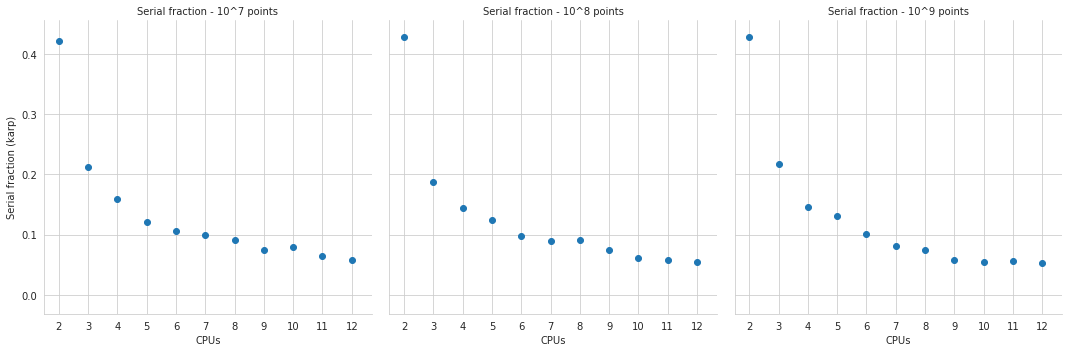

In [9]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "karp")
        .set_titles("Serial fraction - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Serial fraction (karp)"))
g.set(xlim=(1.5, None))
g.set(xticks=list(range(2,13)))

[(0.9, 11.5)]

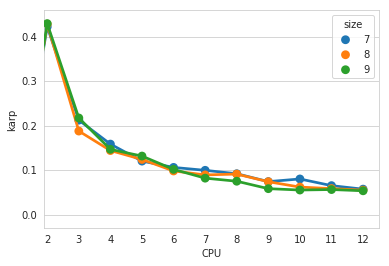

In [10]:
g = sns.pointplot(x="CPU", y="karp", hue="size", data=df)
g.set(xlim=(0.9, None))

# SCALED

In [11]:
path = 'results/scale.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].min())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
print(serial_times)
speedup = np.array([np.ones(12) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup * df["CPU"]

df["efficiency"] = df["speedup"] / df["CPU"]

df["karp"] = (1 / df["speedup"] - 1 / df["CPU"]) / (1 - 1 / df["CPU"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

[9.10637497902, 89.02119398120001]


,mode,CPU,size,time,pi,speedup,efficiency,karp
0,scale,1,7,9.106375,3.142147,1.000000,1.000000,0.000000
1,scale,2,7,12.784282,3.141045,1.424620,0.712310,0.403883
2,scale,3,7,12.551913,3.141857,2.176491,0.725497,0.189183
3,scale,4,7,12.740306,3.141573,2.859076,0.714769,0.133018
4,scale,5,7,12.913189,3.141712,3.525998,0.705200,0.104510
5,scale,6,7,13.071533,3.141886,4.179942,0.696657,0.087085
6,scale,7,7,13.553018,3.141592,4.703353,0.671908,0.081383
7,scale,8,7,13.999864,3.141405,5.203693,0.650462,0.076767
8,scale,9,7,13.978681,3.141465,5.863026,0.651447,0.066880
9,scale,10,7,14.163185,3.141268,6.429610,0.642961,0.061700


### TIME

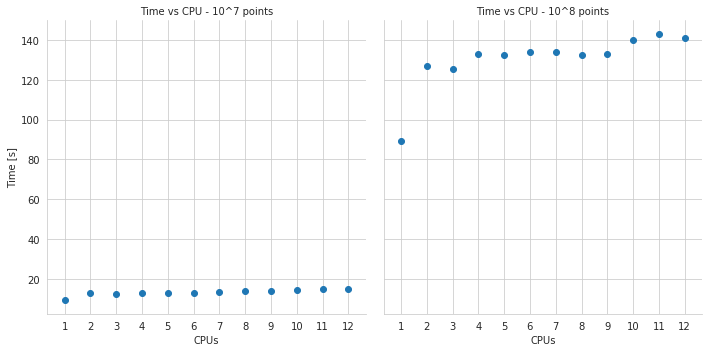

In [12]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "time")
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=list(range(1,13)))

### SPEEDUP

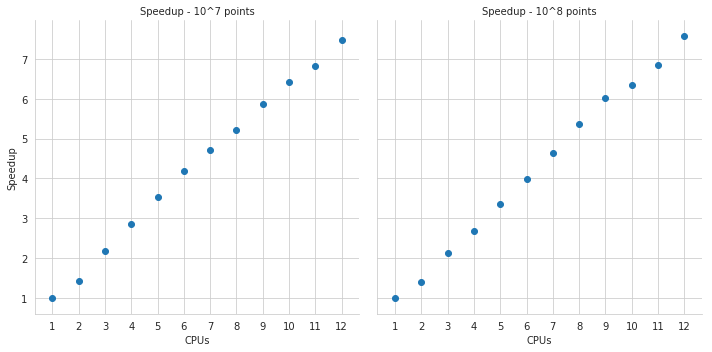

In [19]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "speedup")
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup"))
g.set(xticks=list(range(1,13)))

### EFFICIENCY

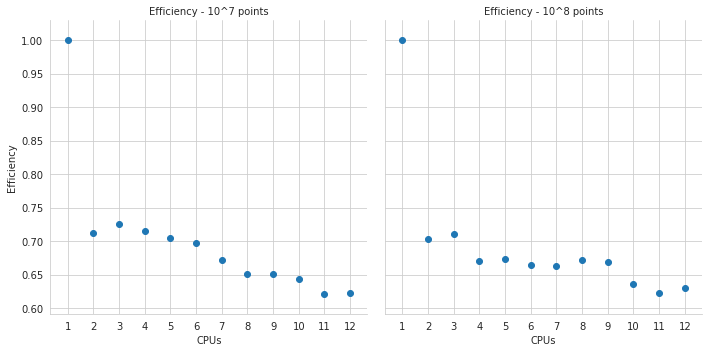

In [14]:
g = sns.FacetGrid(df, col="size",height=5)
g = (g.map(plt.scatter, "CPU", "efficiency")
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency"))
g.set(xticks=list(range(1,13)))

### SERIAL FRACTION

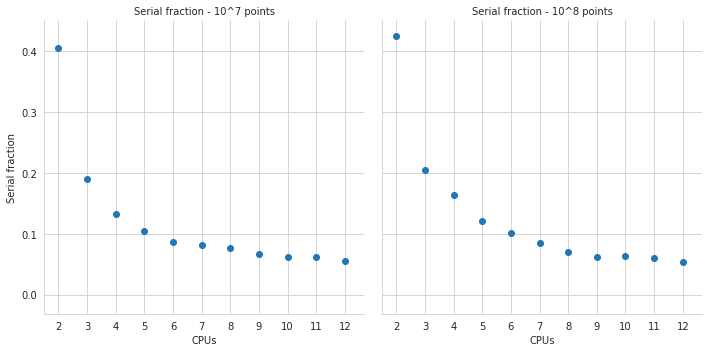

In [17]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "karp")
        .set_titles("Serial fraction - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Serial fraction"))
g.set(xlim=(1.5, None))
g.set(xticks=list(range(2,13)))